In [93]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

with open(r"C:\Users\Admin\Desktop\water-level-estimation\data\B00020S.pkl", 'rb') as file:
    data = pickle.load(file)

data['Date']=pd.to_datetime(data['Date'])
data['B00020S']= data['B00020S'].str.replace(',', '.').astype(float)


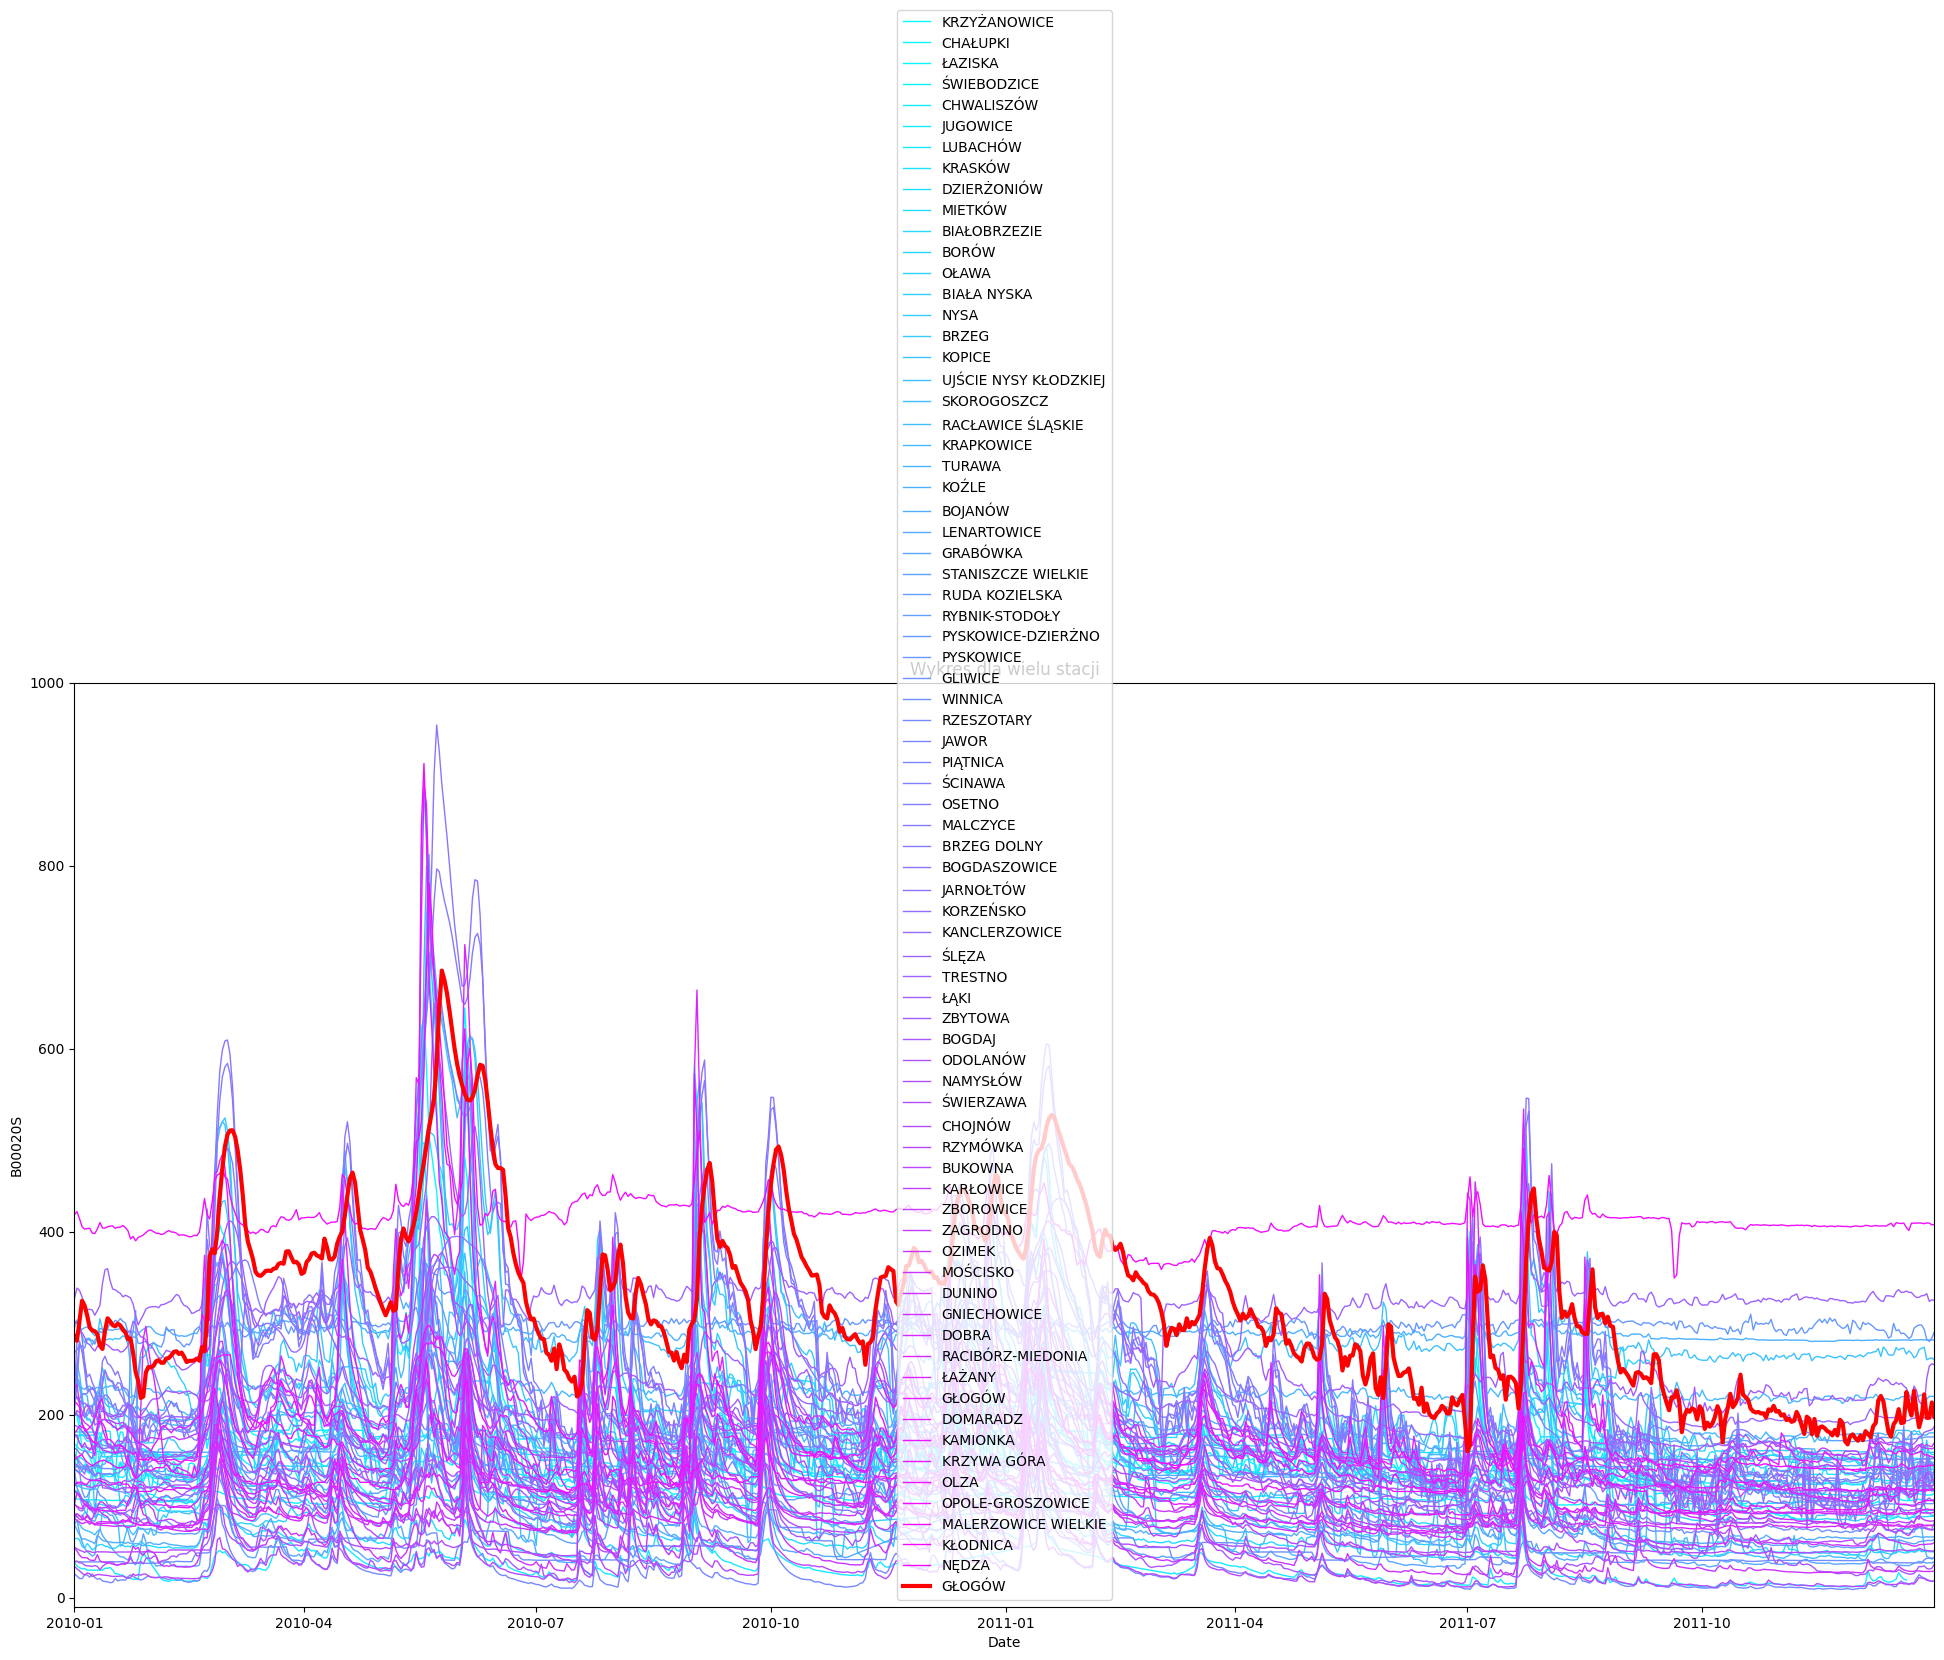

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#stations = data['Station'].unique()
stations = ['KRZYŻANOWICE', 'CHAŁUPKI', 'ŁAZISKA', 'ŚWIEBODZICE', 'CHWALISZÓW', 'JUGOWICE',
            'LUBACHÓW', 'KRASKÓW', 'DZIERŻONIÓW', 'MIETKÓW', 'BIAŁOBRZEZIE', 'BORÓW',
            'OŁAWA', 'BIAŁA NYSKA', 'NYSA', 'BRZEG', 'KOPICE', 'UJŚCIE NYSY KŁODZKIEJ',
            'SKOROGOSZCZ', 'RACŁAWICE ŚLĄSKIE', 'KRAPKOWICE', 'TURAWA', 'KOŹLE', 'BOJANÓW',
            'LENARTOWICE', 'GRABÓWKA', 'STANISZCZE WIELKIE', 'RUDA KOZIELSKA',
            'RYBNIK-STODOŁY', 'PYSKOWICE-DZIERŻNO', 'PYSKOWICE', 'GLIWICE', 'WINNICA',
            'RZESZOTARY', 'JAWOR', 'PIĄTNICA', 'ŚCINAWA', 'OSETNO', 'MALCZYCE',
            'BRZEG DOLNY', 'BOGDASZOWICE', 'JARNOŁTÓW', 'KORZEŃSKO', 'KANCLERZOWICE',
            'ŚLĘZA', 'TRESTNO', 'ŁĄKI', 'ZBYTOWA', 'BOGDAJ', 'ODOLANÓW', 'NAMYSŁÓW',
            'ŚWIERZAWA', 'CHOJNÓW', 'RZYMÓWKA', 'BUKOWNA', 'KARŁOWICE', 'ZBOROWICE',
            'ZAGRODNO', 'OZIMEK', 'MOŚCISKO', 'DUNINO', 'GNIECHOWICE', 'DOBRA',
            'RACIBÓRZ-MIEDONIA', 'ŁAŻANY', 'GŁOGÓW', 'DOMARADZ', 'KAMIONKA', 'KRZYWA GÓRA',
            'OLZA', 'OPOLE-GROSZOWICE', 'MALERZOWICE WIELKIE', 'KŁODNICA', 'NĘDZA']


fig, ax = plt.subplots()

data_temp = data.groupby(['Date', 'Station'])['B00020S'].mean().reset_index()

# Filtracja po roku
po = 2010
przed = 2011
data_temp =  data_temp[(data_temp['Date'].dt.year >= po) & (data_temp['Date'].dt.year <= przed)]

# Utwórz paletę kolorów zimnych
cold_palette = sns.color_palette('cool', n_colors=len(stations))

for i, station in enumerate(stations):
    data_station = data_temp[data_temp['Station'] == station]

    # Dostosuj kolor linii
    color = cold_palette[i]  # Wybierz kolor z palety
    ax.plot(data_station['Date'], data_station['B00020S'], label=station, linewidth=1, color=color)

# Dla 'GŁOGÓW' użyj koloru czerwonego
data_station_glogow = data_temp[data_temp['Station'] == 'GŁOGÓW']
ax.plot(data_station_glogow['Date'], data_station_glogow['B00020S'], label='GŁOGÓW', linewidth=3, color='red')

ax.legend()

ax.set_xlabel('Date')
ax.set_ylabel('B00020S')
ax.set_title('Wykres dla wielu stacji')

fig.set_size_inches(24, 12)

# Limity dla czytelności
plt.xlim(data_temp['Date'].min(), data_temp['Date'].max())
plt.ylim(-10, 1000)
plt.show()
